## Planets nests tutorial 

A simple tutorial to decompose example deep moonquake waveforms using the principal component analysis. 


## Getting set up 

### conda enviroment 

This code only needs obspy create an enviroment following. 

```

$ conda create -n obspy python=3.7   # or other supported Python version
$ conda activate obspy  # this command used to be 'source activate obspy' on older conda versions < 4.4
(obspy) $ 
(obspy) $ conda install obspy

```

### Inputs 
* A list of waveforms with inital time picks 
* The processed waveforms on this list
* A picked time window 

### Process 
The PCA is dependent on the waveform allignment. The waveforms are alligned first using the cross correaltion, then by searching for the time shift between events that maximized the energy in the first principal compoent. 
<br>
The PCA is carried out using the singular value decomposition. 

### Outputs 

* ds.S = Singular values/variance explanied by each prinicpal component
* ds.U = principal components
* ds.V = weights for each event for each principal compoent 

In [6]:
#having a go at running 
import planetseis_Xcorr_time_listin 
ds = planetseis_Xcorr_time_listin.dstack()
ds.setup('../input_list/S12_MHN_peaked.txt','single_moonquake',[100,700])
#the setup giving a list of events, and then the final part is the timewindow 
ds.xcorr(master = ds.adata[:,0,0,0,0]) #alligning the events using cross correlation 
print("FINE TUNE")
ds.iterative_grid_fine_tune(search_range =5, temp = 1000, Niter = 5) #fine tune the timeshifts using PCA 
print("FINE TUNE DONE")
print(ds.ishfs.flatten())
ds.replaceadata(iev=ds.iev,ichan = ds.ichan,istat = ds.istat,ifreq = ds.ifreq)
ds.initadata()
ds.calcperclow_saved() #calculate the components using PCA 
ds.plotU(Ncmp=ds.Nev) # plotting all the principal components


[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]
FINE TUNE
number of iterations5
iteration0


KeyboardInterrupt: 

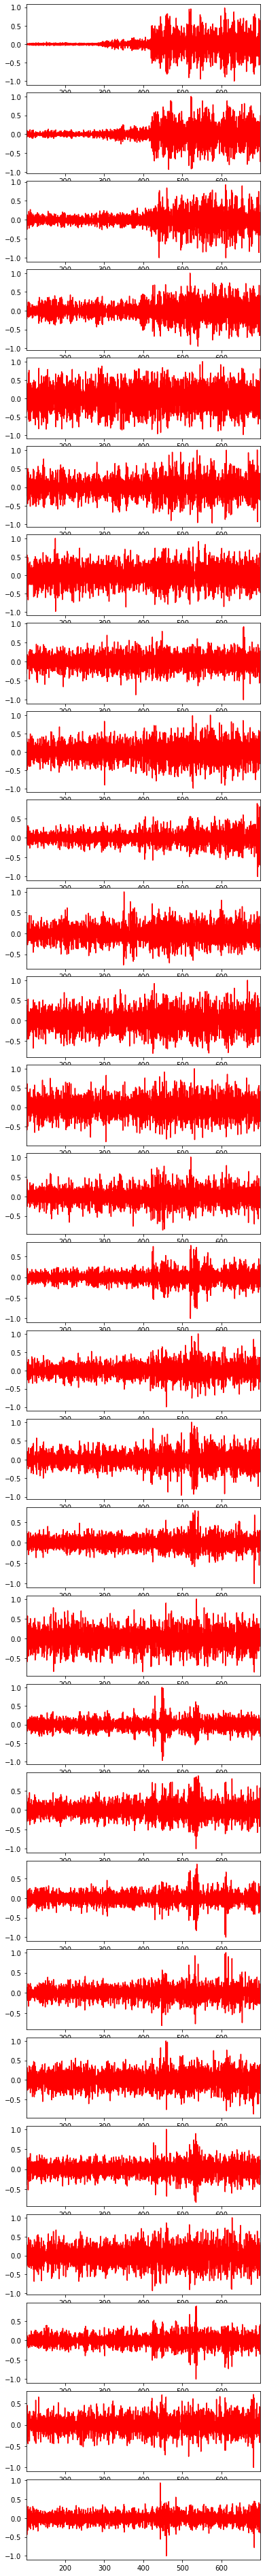

In [3]:
ds.plotU(Ncmp=ds.Nev)